<a href="https://colab.research.google.com/github/routb68/ml_repo/blob/main/PCA_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question


> *1.1 Write a piece of code to run the PCA algorithm on this MNIST data-set. Show the images of the principal components that you obtain. How much of the variance in the data-set is explained by each of the principal components?*




---





## Importing libraries and Data downloding

> Numpy offers better computational advantages over traditional containers of python3,so I will be using Numpy array to store data and other functionality offered by numpy such as eigen vector calculation, matrix multiplication, matrix transpos function etc. I will be using Mnist dataset already present in keras.datasets, using that dataset for further computation and loading that dataset. I will be using matplotlib to plot our images.








In [1]:
!python --version

Python 3.8.10


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
np.version.version

'1.21.6'

I am using google colab to do all the computations and for refrence python version - 3.8.10 and numpy version - 1.21.6 .

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


# About Data


> Our dataset splited into 2 different data set, here "x_train" contains 60,000 handwritten digits which are image data of resolution (28 X 28) and lebeled with what "y_train" which repersents what digit image contains. Similarly "x_test" contains 10,000 data points of similar attributes.


> I will be running our piece of code of the PCA algorithm on "x_train" dataset.

# Data Visulizaton and Transformation


> Using matplotlib to plot random 9 sample images, where the title will be from "y_train" for better visulization of which lebel its associated with.



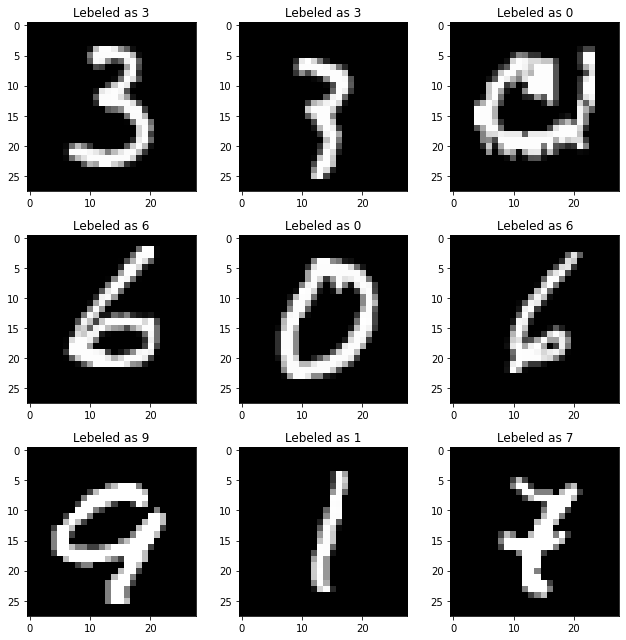

In [5]:
import random
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Lebeled as {}".format(y_train[num]))
    
plt.tight_layout()



> Let's print what a single digit conatins



In [6]:
print("x_train[0] shape", x_train[0].shape)
print(x_train[0])

x_train[0] shape (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 



> Here each pixel is valued between 0 to 255. Each image contains (28 x28) such pixels. Now let's transform the multi-dimensional data into single dimension.
Mean now our "x_train" will be transformed from (60,000 x 28 x 28) to (60,000 x 784).





In [7]:
x_train = x_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
x_test = x_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

print("x_train matrix shape", x_train.shape)
print("x_test matrix shape", x_test.shape)

x_train matrix shape (60000, 784)
x_test matrix shape (10000, 784)




> Let's transform our data into numpy array. using numpy as numpy offers better computation speed, some mathematical functions which we will be using for PCA algorithm such as eigen value eigen vector computation.



In [8]:
np_x_train = np.array(x_train)
np_x_test = np.array(x_test)



> Let's print newly created numpy array's datatype and one sample data.



In [9]:
print("np_x_train shape", np_x_train.shape)
print("np_x_train[0] datatype", np_x_train[0].dtype)

np_x_train shape (60000, 784)
np_x_train[0] datatype uint8


In [10]:
np_x_train = np_x_train.astype(np.float64)
np_x_test = np_x_test.astype(np.float64)
print("np_x_train[0] datatype", np_x_train[0].dtype)

np_x_train[0] datatype float64




> As data type is "uni8" unsinged 8-bit integer, it is storing data between 0-255. As PCA requires centered data and our datatype not able to store non-postive data we have to change our data type. Changing data type to "float64". 



In [11]:
from sklearn.preprocessing import StandardScaler
np_x_train = StandardScaler().fit_transform(np_x_train)
np_x_test = StandardScaler().fit_transform(np_x_test)

In [12]:
features = np_x_train.T
covariance_matrix = np.cov(features)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [24]:
for i in range (784):
  print(f"{i+1} th eigen value is - {eig_vals[i]}")

1 th eigen value is - 40.487635108468055
2 th eigen value is - 29.241697518949646
3 th eigen value is - 26.811804486217543
4 th eigen value is - 20.686618220003854
5 th eigen value is - 18.0766501234371
6 th eigen value is - 15.733177866400633
7 th eigen value is - 13.790609093486111
8 th eigen value is - 12.517589094135065
9 th eigen value is - 11.006795270542169
10 th eigen value is - 10.050497052250849
11 th eigen value is - 9.62045779343623
12 th eigen value is - 8.63097355552676
13 th eigen value is - 7.991596865094802
14 th eigen value is - 7.814882145374861
15 th eigen value is - 7.375537858883218
16 th eigen value is - 7.130587505186916
17 th eigen value is - 6.713980018772321
18 th eigen value is - 6.604007488656958
19 th eigen value is - 6.406048463263045
20 th eigen value is - 6.23737743278969
21 th eigen value is - 5.93229171804716
22 th eigen value is - 5.760598548469495
23 th eigen value is - 5.484033638105964
24 th eigen value is - 5.31859720962419
25 th eigen value is -

In [14]:
variance = 0
for i in range (784):
  variance = ( variance + eig_vals[i])
print(variance)

717.0119501991888


In [15]:
var95 = 0
dimension = 0
for i in range (784):
  var95 = (var95 + np.real(eig_vals[i]))
  if(var95 >= (0.95 * variance)):
    dimension = i
    break;
print(var95)
print(var95/variance)
print(dimension)

681.2749199701414
0.9501583896626554
335


0



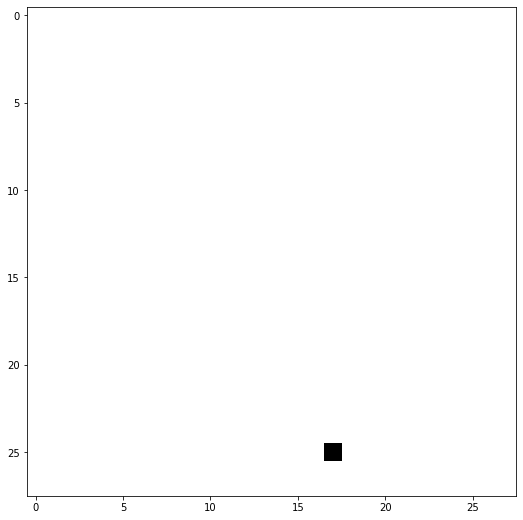

20



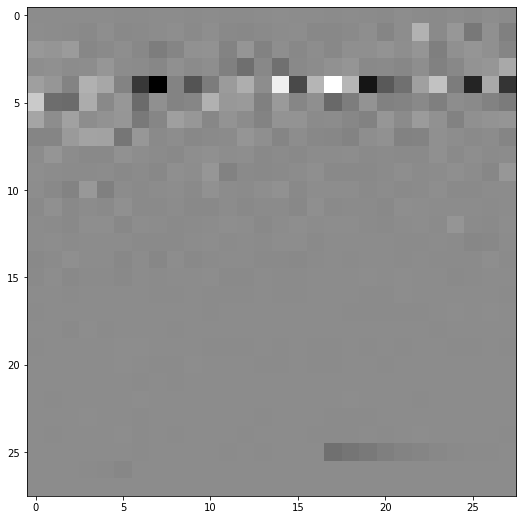

40



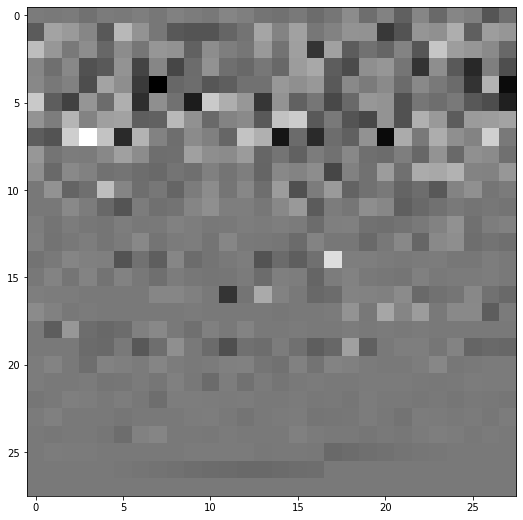

60



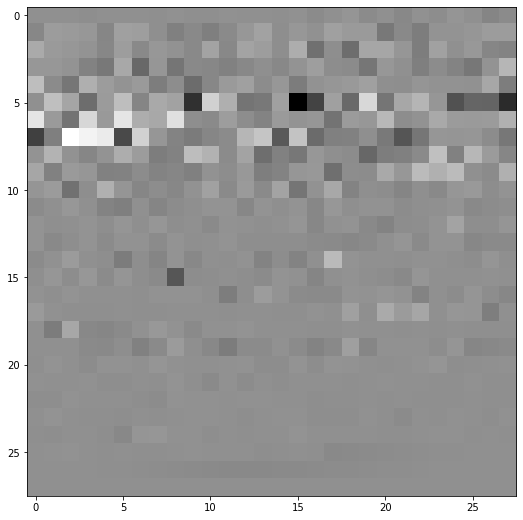

80



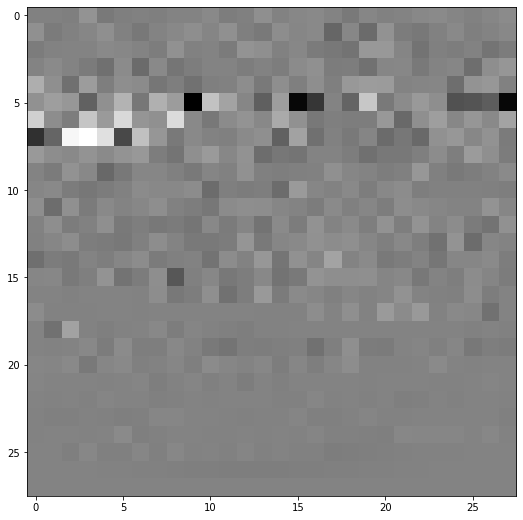

100



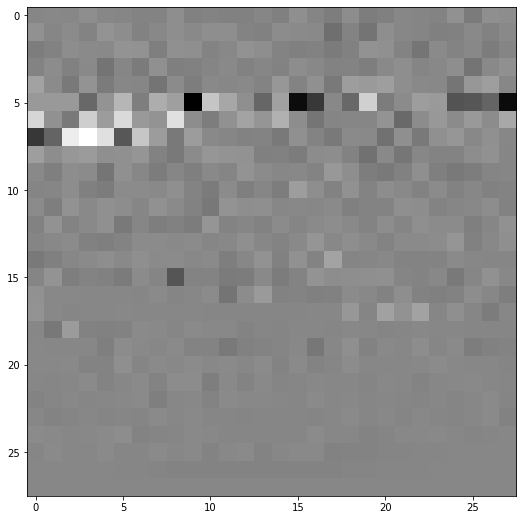

120



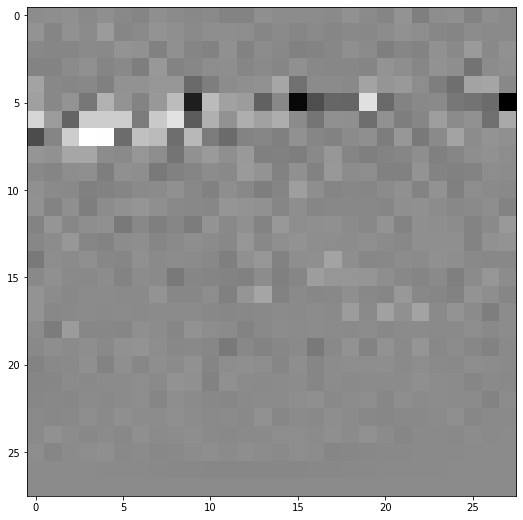

140



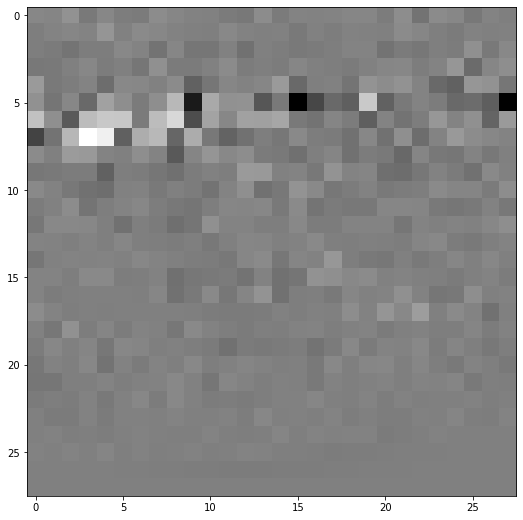

160



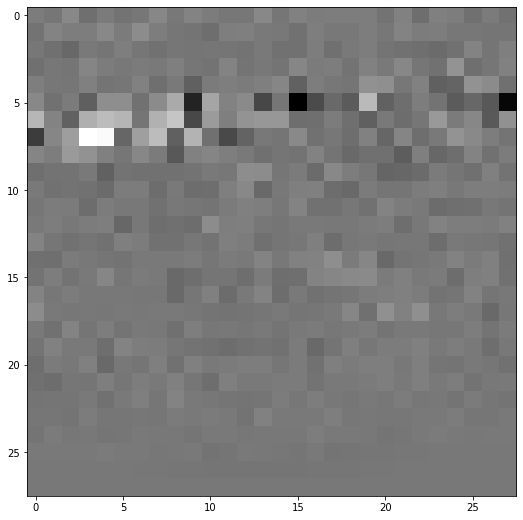

180



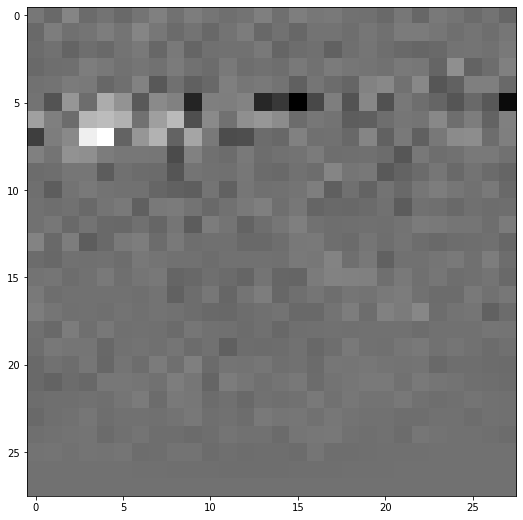

200



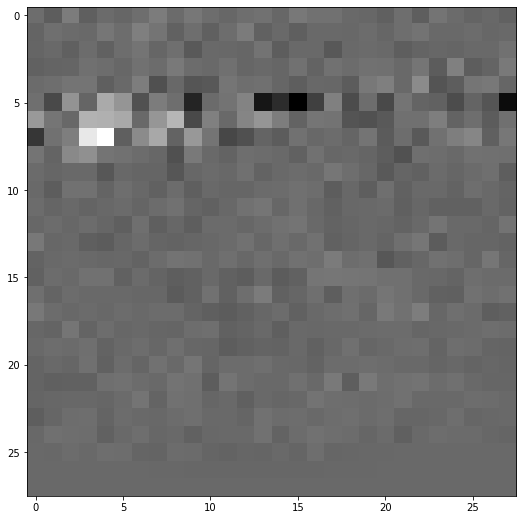

220



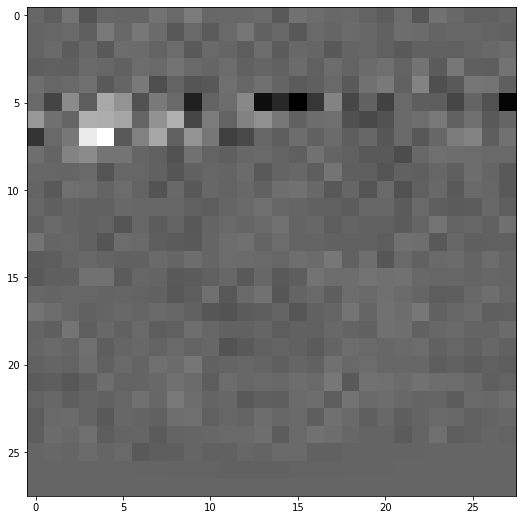

240



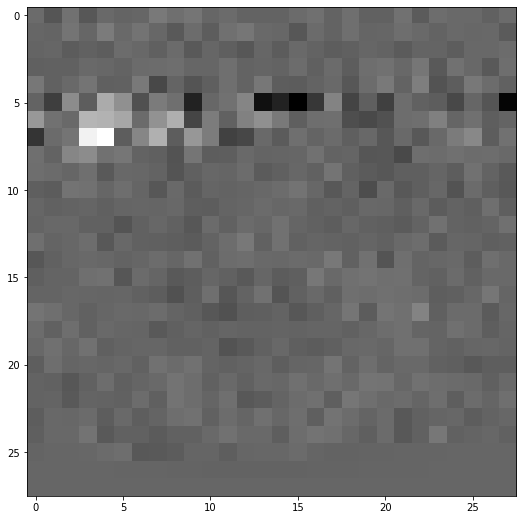

260



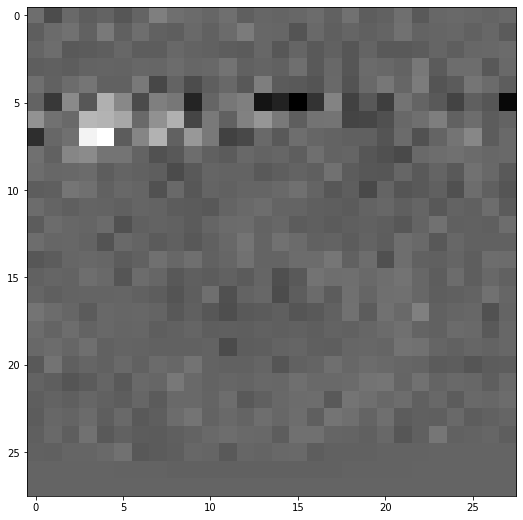

280



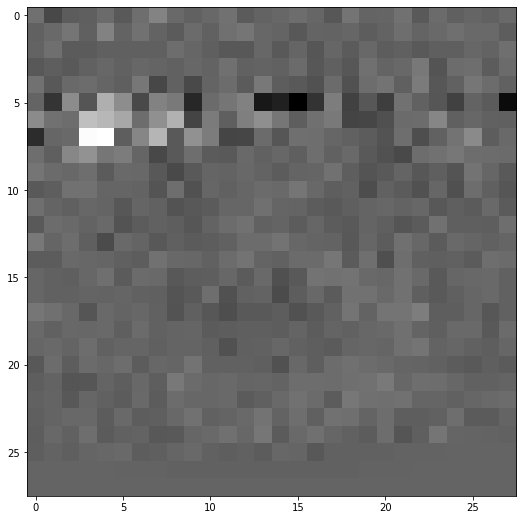

300



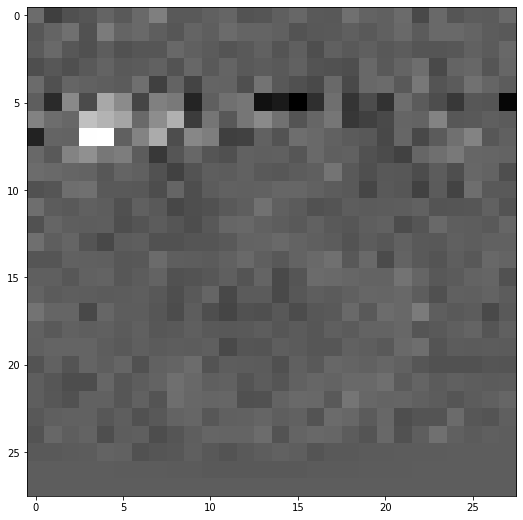

320



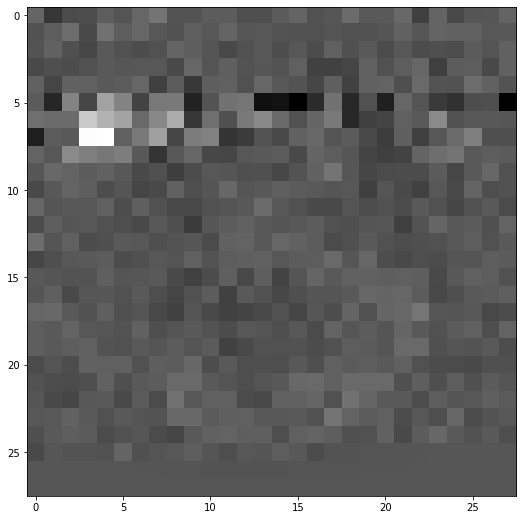

340



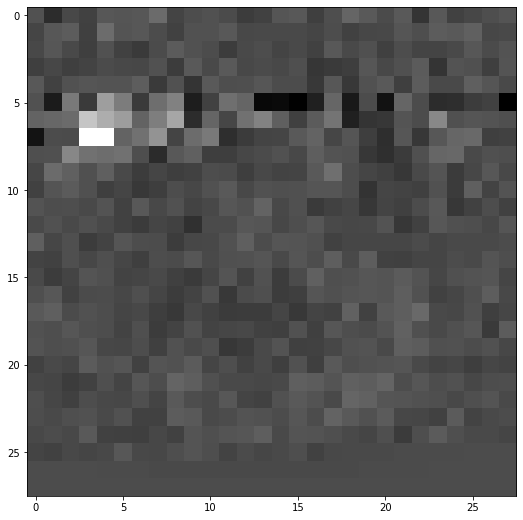

360



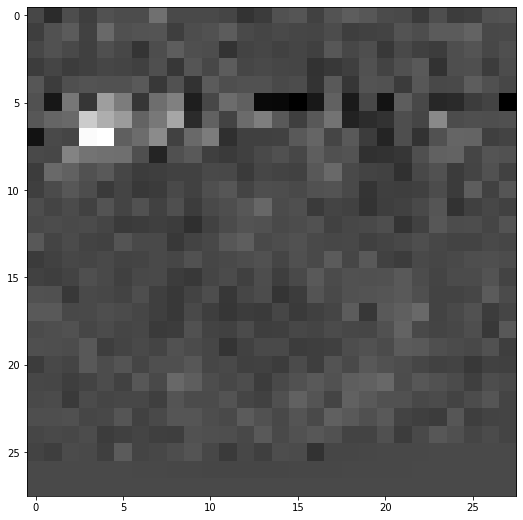

380



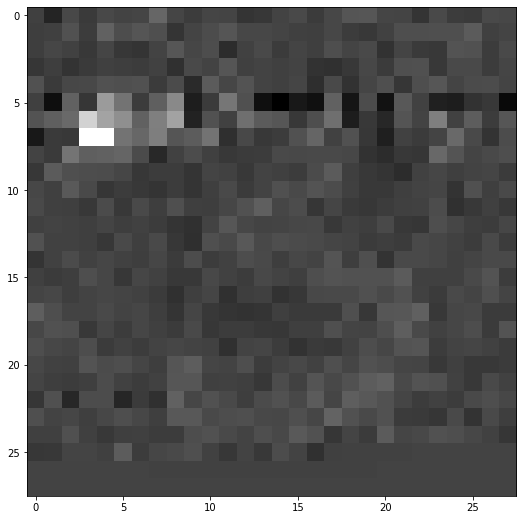

400



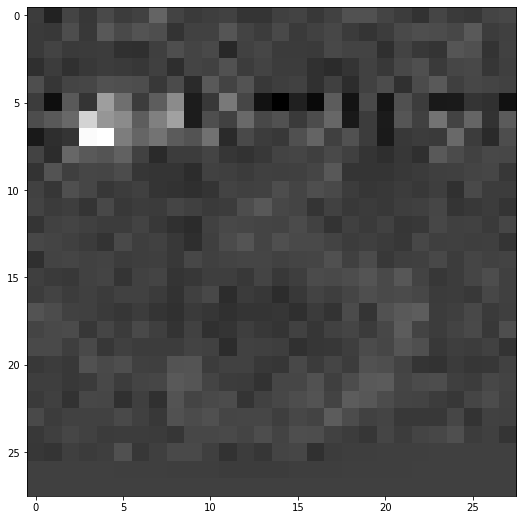

420



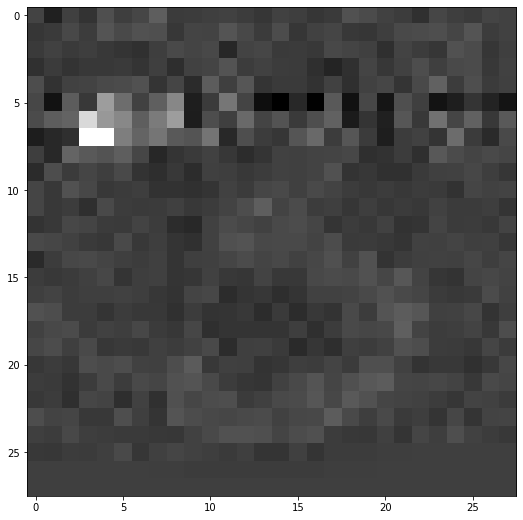

440



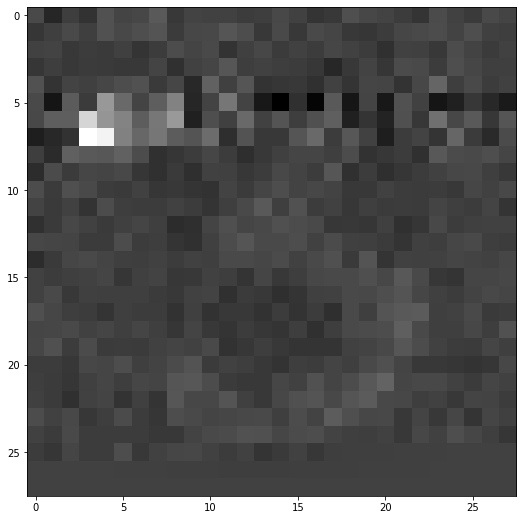

460



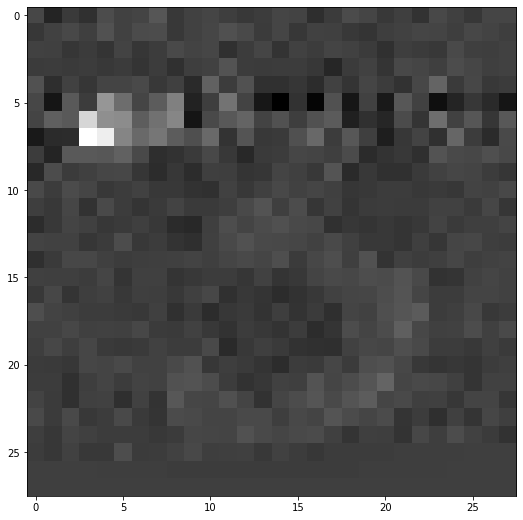

480



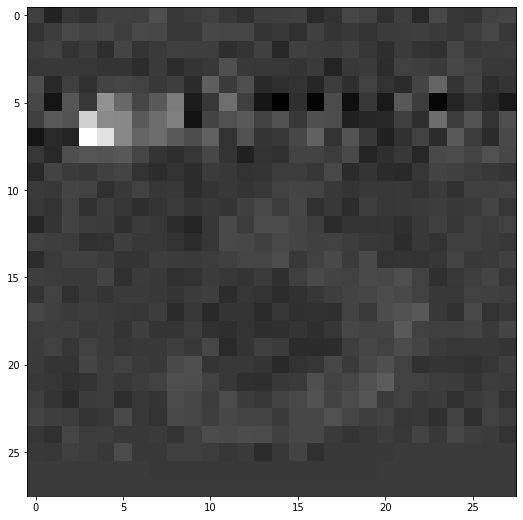

500



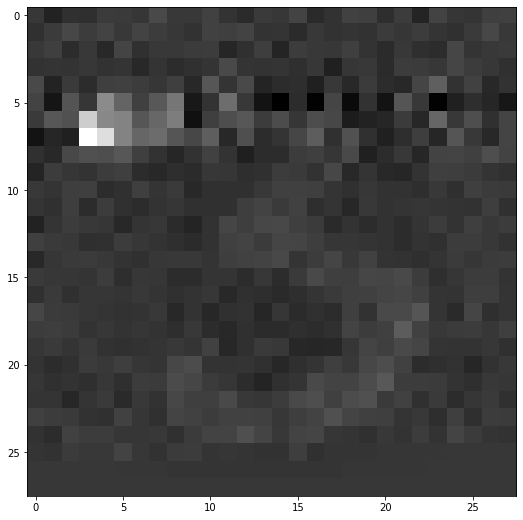

520



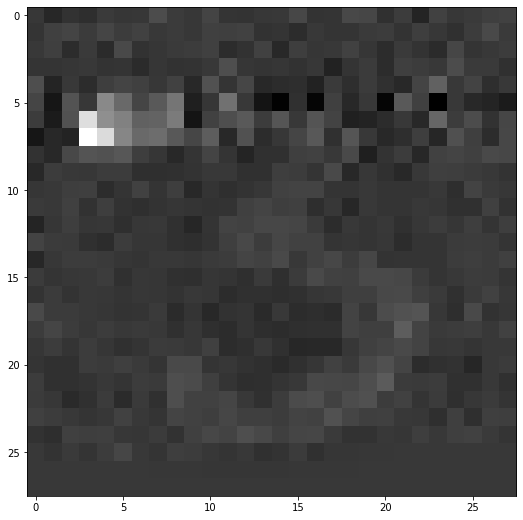

540



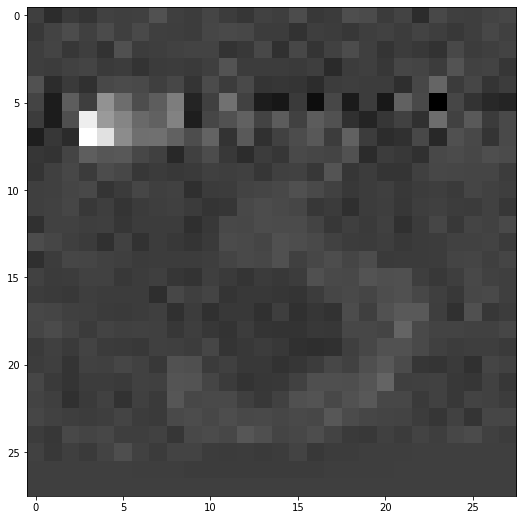

560



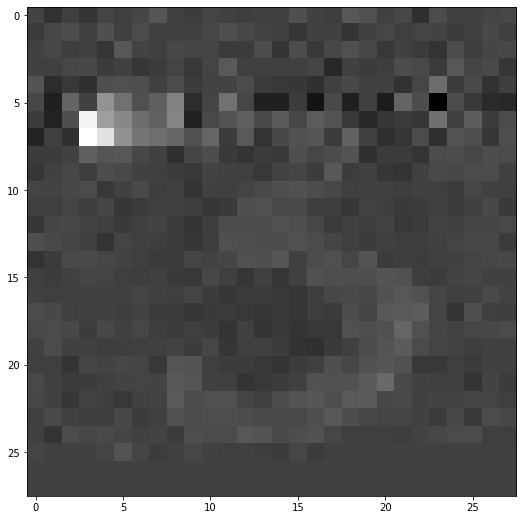

580



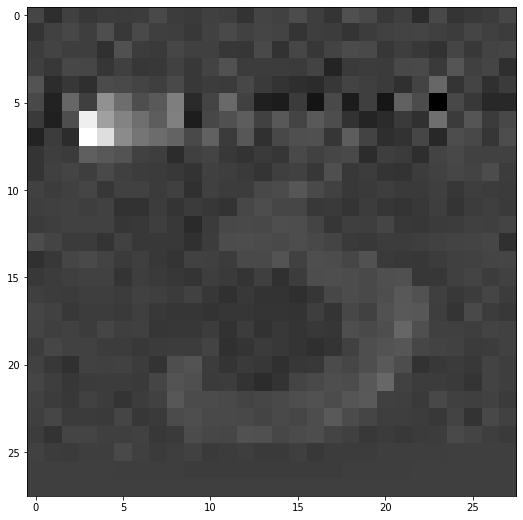

600



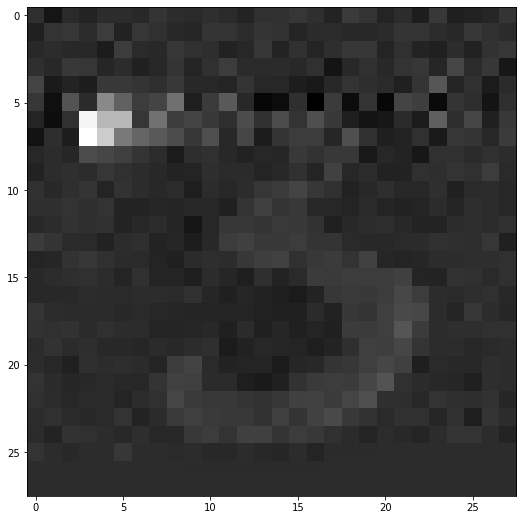

620



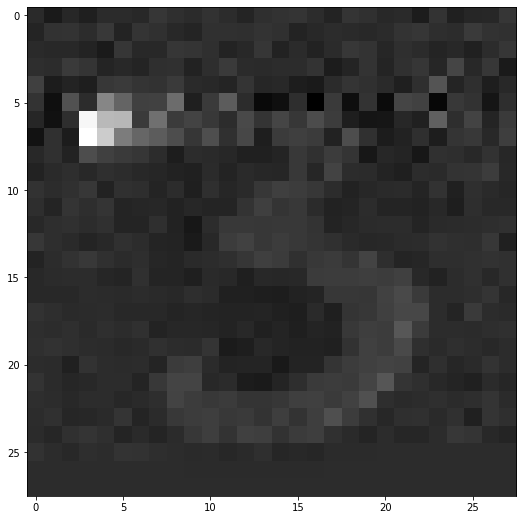

640



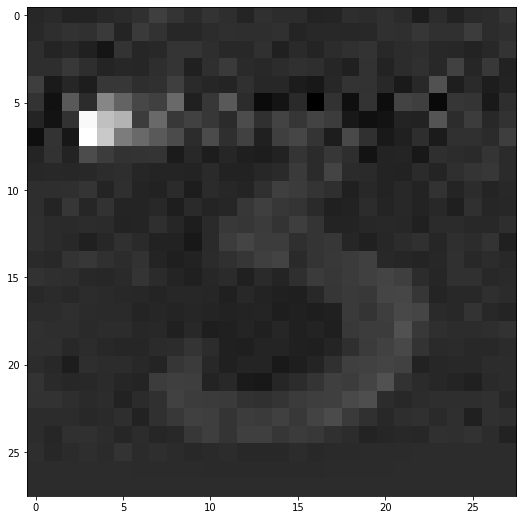

660



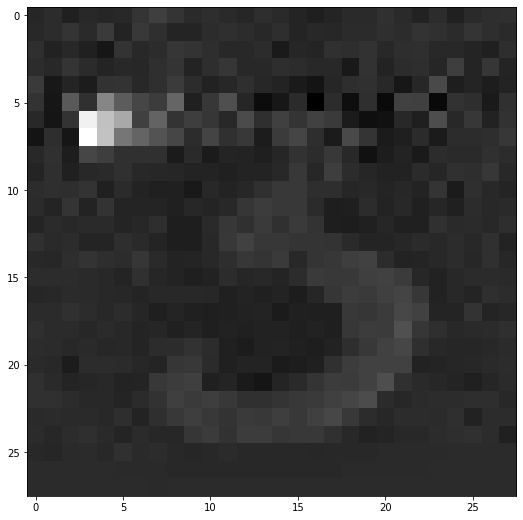

680



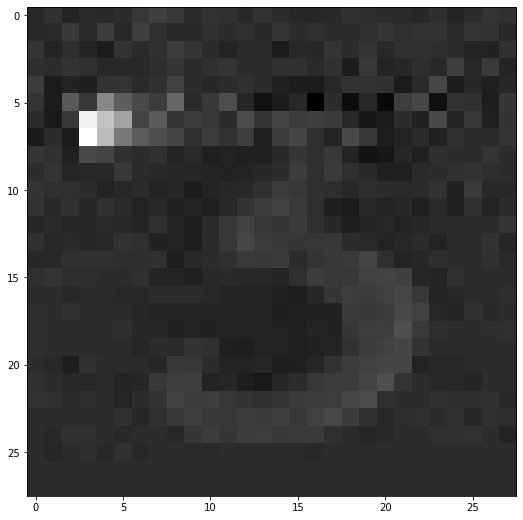

700



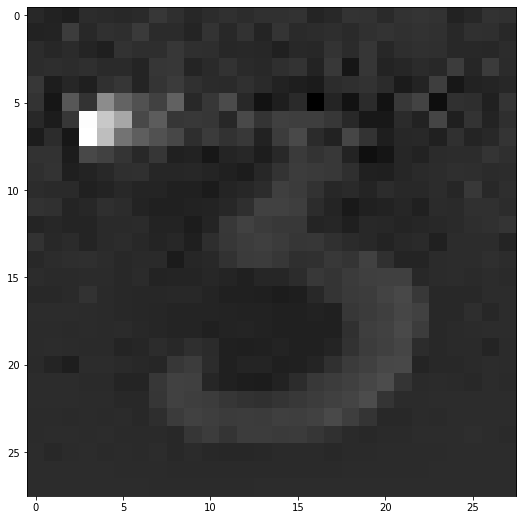

720



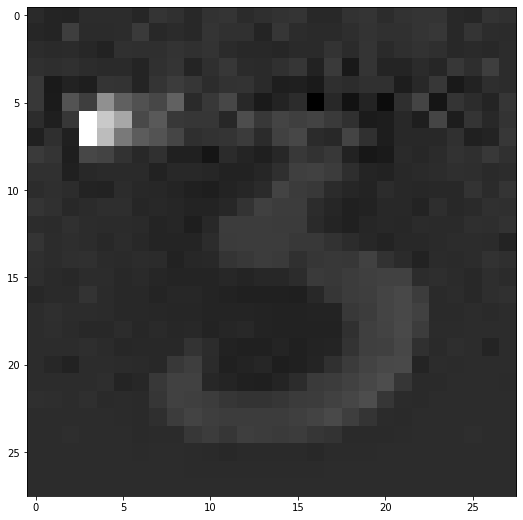

740



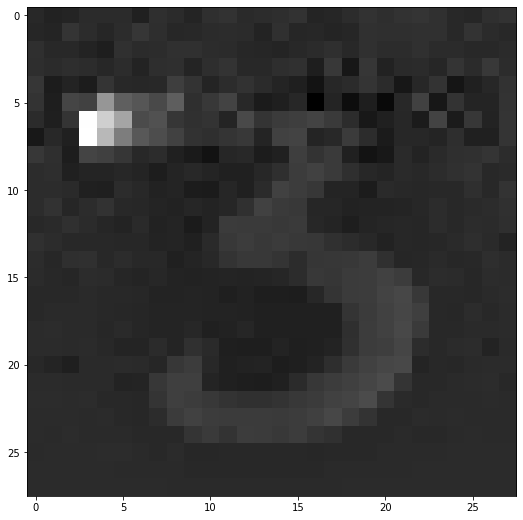

760



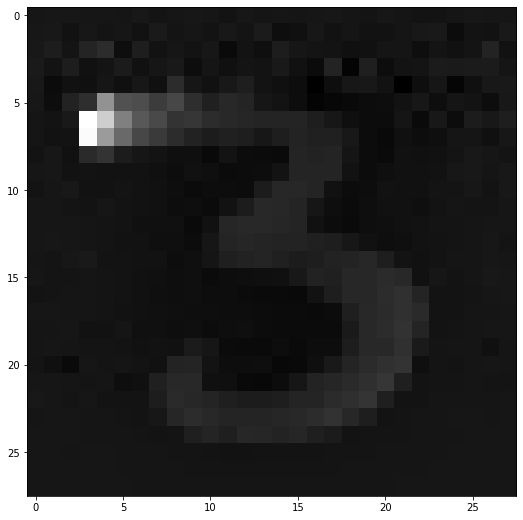

780



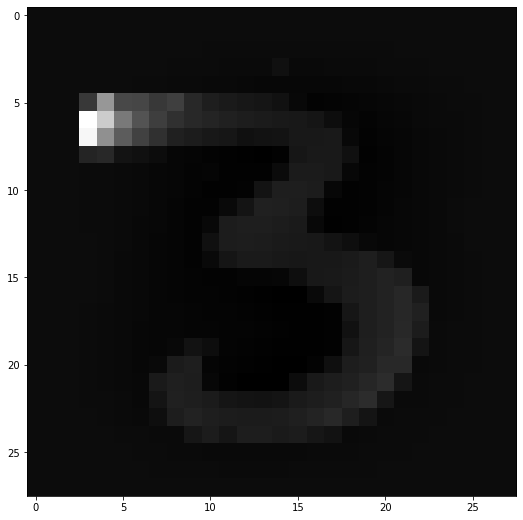

In [19]:
d = eig_vecs[0]
for i in range (784):
  a = eig_vecs[i]
  b = np_x_train[12]
  c = np.matmul(b.T,a)
  if(i==0):
    d = a*c
  else:
    d = (d+(a*c))
  if(i%20==0):
    print (i)
    print()
    e = d
    plt.imshow(e.reshape(28,28), cmap='gray')
    plt.show()